In [49]:
# Модуль string необходим для очистки текста от знаков препинания
import string
# re понадобится для работы с регулярными выражениями, например - \n
import re
# Для разбивки текста на отдельные слова (токенизации) потребуется nltk
from nltk import word_tokenize
import nltk
# Для подсчёта слов
from nltk.probability import FreqDist
# Cпециальный модуль, в котором собраны все стоп-слова из разных языков (предлоги, артикли, союзы и т.п.)
from nltk.corpus import stopwords
# Библиотека для визуализации самых популярных слов в тексте
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Загрузка файла

Откроем текстовый файл с рассказом и загрузим его содержимое в переменную f

In [1]:
f = open('ХрюшаAnalysis.txt', "r", encoding='utf-8')
text = f.read()

Выведем содержимое первых 300 символов, чтобы убедиться, что файл считывается корректно

In [2]:
print(text[:300])

﻿Хрюша
Рассветные лучи заиграли на занавесках и осветили спальню. Половину комнаты занимала двуспальная кровать, заваленная разноцветными подушками всевозможных форм и размеров. В противоположном углу возвышался резной шкаф с покосившимися дверцами. На полу был расстелен потёртый ковёр. С потолка св


## Очистка текста

Переведём все слова в нижний регистр

In [9]:
text = text.lower()

Для очистки текста от знаков препинания воспользуемся модулем string, который мы дополним кавычками и многоточием

In [13]:
spec_chars = string.punctuation + '«»\t—…’–'
text = "".join([ch for ch in text if ch not in spec_chars])

Заменим переносы строк на пробелы

In [15]:
text = re.sub('\n', ' ', text)

Уберем из текста цифры

In [17]:
text = "".join([ch for ch in text if ch not in string.digits])

Посмотрим на результат проделанной работы

In [18]:
print(text[:300])

﻿хрюша рассветные лучи заиграли на занавесках и осветили спальню половину комнаты занимала двуспальная кровать заваленная разноцветными подушками всевозможных форм и размеров в противоположном углу возвышался резной шкаф с покосившимися дверцами на полу был расстелен потёртый ковёр с потолка свисала


## Разбивка текста на слова

Токенизируем слова в тексте

In [21]:
text_tokens = word_tokenize(text)

Переведем токены в текстовый формат

In [22]:
text = nltk.Text(text_tokens)

Подсчитаем количество каждого слова в тексте

In [23]:
fdist = FreqDist(text)

Выведем 5 наиболее частых слов в тексте

In [24]:
print(fdist.most_common(5))

[('и', 34), ('в', 25), ('на', 20), ('хрюша', 16), ('с', 15)]


Как видно, наиболее популярными словами в тексте являются предлоги и союзы. Для большей информативности их нужно исключить из анализа

## Очистка текста от союзов, местоимений и предлогов

Добавляем стоп-слова из русского языка

In [ ]:
#russian_stopwords.extend(['это', 'чтò','всё','сказал', 'сказала','говорил','говорила'])

Обновим токены с учётом стоп-слов, переведём их в тесктовый формат и отобразим 10 самых популярных слов в тексте

In [37]:
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]
text = nltk.Text(text_tokens)
fdist = FreqDist(text)
print(fdist.most_common(10))

[('хрюша', 16), ('дядя', 6), ('сева', 6), ('жмыхнутых', 4), ('жмыхнутые', 4), ('хрюшу', 4), ('пришлось', 3), ('принялся', 3), ('ловушки', 3), ('ещё', 3)]


Для чистоты расчёта уберём слова "ещё" и "хрюшу" (это имя героя рассказа в другой форме). Для этого дополним список стоп-слов и повторим процедуру подсчёта слов.

In [47]:
# добавляем свои слова в список стоп-слов
russian_stopwords.extend(['ещё', 'хрюшу','всё'])
# повторяем подсчёт
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]
text = nltk.Text(text_tokens)
fdist_sw = FreqDist(text)
print(fdist_sw.most_common(10))

[('хрюша', 16), ('дядя', 6), ('сева', 6), ('жмыхнутых', 4), ('жмыхнутые', 4), ('пришлось', 3), ('принялся', 3), ('ловушки', 3), ('время', 3), ('клавдия', 2)]


## Облаков слов

Для вывода изображения со словами воспользуемся библеотеками wordcloud и matplotlib

Перевдём всё в текстовый формат

In [51]:
text_raw = " ".join(text)

Зададим размеры изображения

In [52]:
wordcloud = WordCloud(width = 1600, height=800).generate(text_raw)

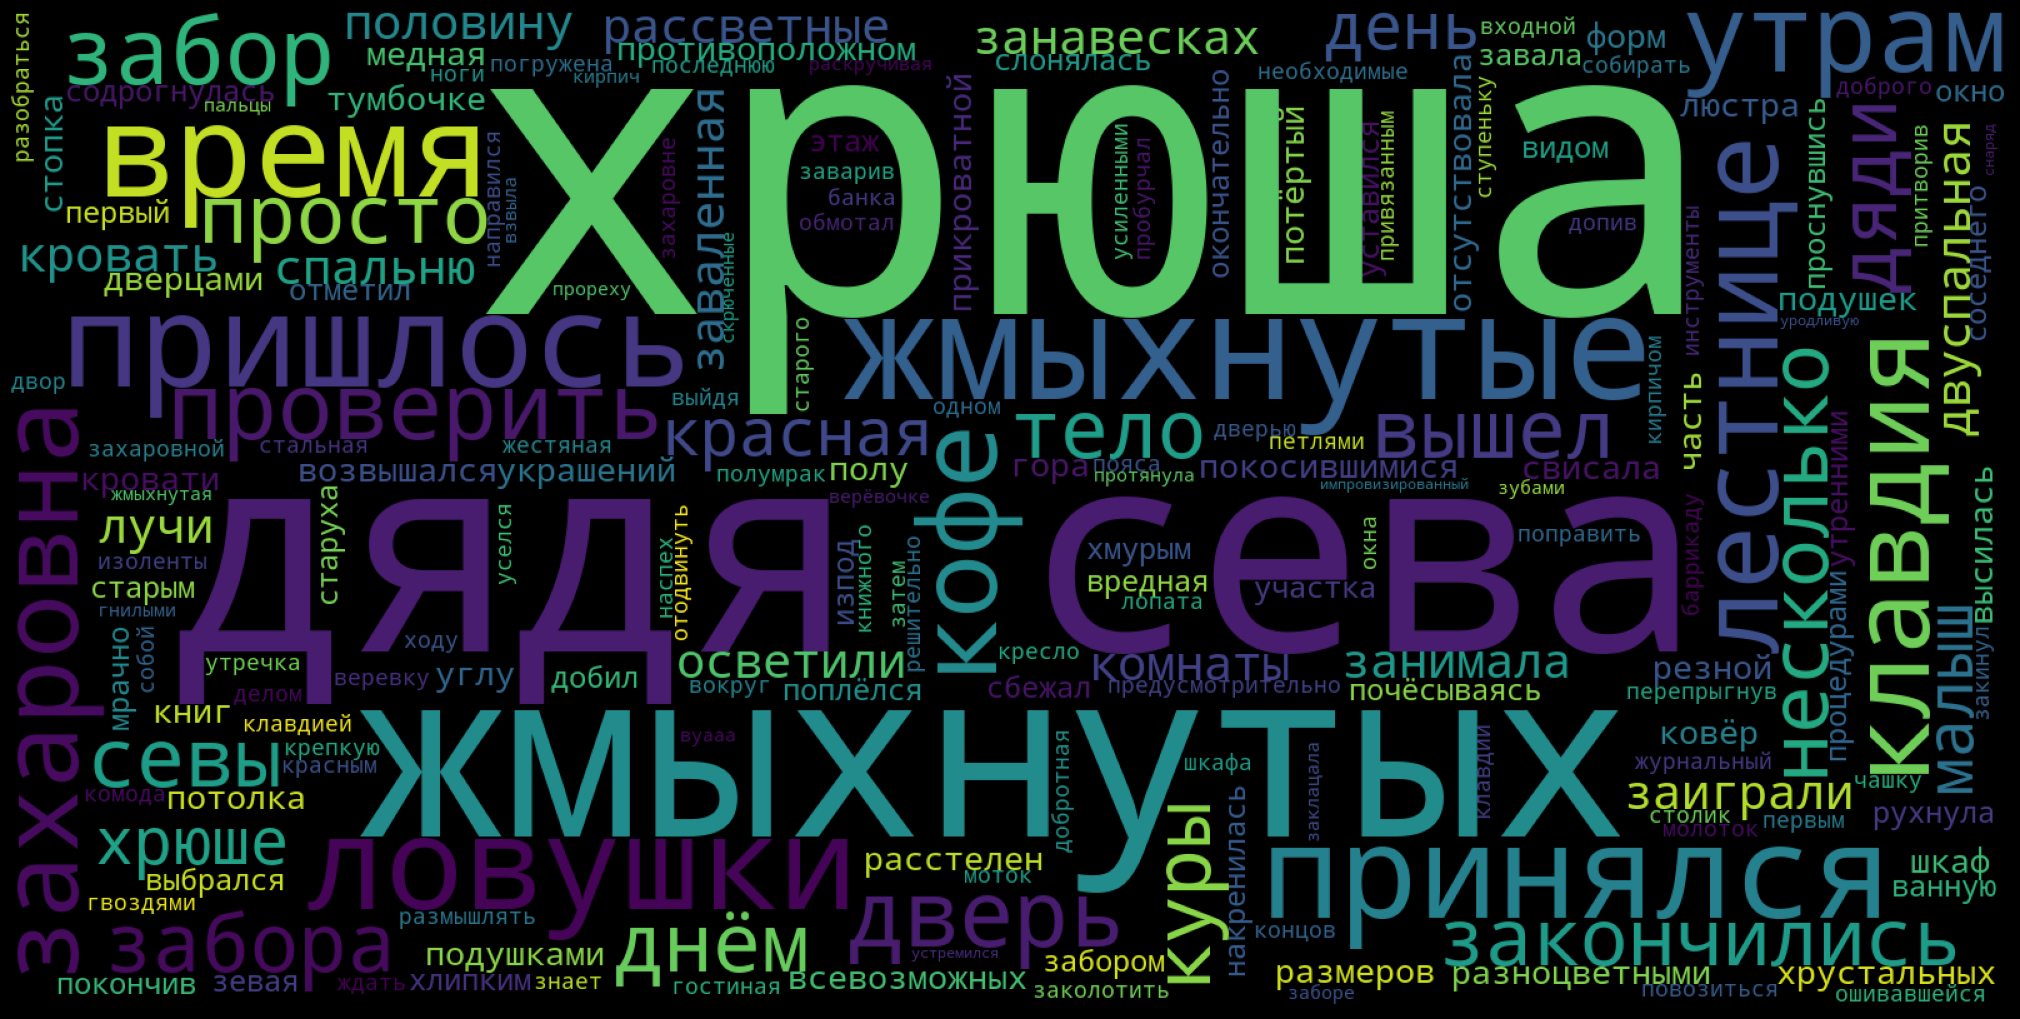

In [54]:
plt.figure( figsize=(20,10), facecolor='k')
# Добавим облако слов
plt.imshow(wordcloud)
# Отключим отображение осей
plt.axis("off")
# Уберём рамку
plt.tight_layout(pad=0)
plt.show()